In [1]:
import os, json
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag, ne_chunk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
entries = os.listdir('../Data/Questions')
CQs = {}
for e in entries:
    with open(f'../Data/Questions/{e}', 'r') as file:
        df = json.load(file)
    CQs[f'{e.split(".")[0]}'] = df
dfs = pd.DataFrame()
for k in CQs.keys():
    df = CQs[f'{k}']
    data_dicts = [{key: item[key] for key in ['context','subjectCQ', 'propertyCQ', 'objectCQ']} for item in df]
    df = pd.DataFrame(data_dicts)
    df = df.melt(var_name='key', value_name='item')
    df['theme'] = f'{k}'
    dfs = pd.concat([dfs, df])
dfs = dfs.reset_index(drop=True)
#calcuate for frequency-based features
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('maxent_ne_chunker')
nltk.download('words')

def count_tokens(sentence):
    words = word_tokenize(sentence)
    return len(words)

def count_pos_tags(sentence, tag_prefix):
    words = word_tokenize(sentence)
    pos_tags = pos_tag(words)
    return sum(1 for word, tag in pos_tags if tag.startswith(tag_prefix))

def count_unique_words(sentence):
    words = word_tokenize(sentence)
    return len(set(words))

def count_stop_words(sentence):
    words = word_tokenize(sentence)
    return sum(1 for word in words if word in stopwords.words('english'))

def count_sentence_length(sentence):
    return len(sentence)

def count_named_entities(text):
    sentences = sent_tokenize(text)
    named_entities = []

    for sentence in sentences:
        words = word_tokenize(sentence)
        tagged_words = pos_tag(words)
        ne_tree = ne_chunk(tagged_words)

        for subtree in ne_tree:
            if hasattr(subtree, 'label'):  # Check if it's a NE subtree
                named_entities.append(subtree)

    return len(named_entities)


dfs['length'] = dfs['item'].apply(count_sentence_length)
dfs['Word_count'] = dfs['item'].apply(count_tokens)
dfs['Verb_count'] = dfs['item'].apply(lambda x: count_pos_tags(x, 'VB'))
dfs['Noun_count'] = dfs['item'].apply(lambda x: count_pos_tags(x, 'NN'))
dfs['Adj_count'] = dfs['item'].apply(lambda x: count_pos_tags(x, 'JJ'))
dfs['Adv_count'] = dfs['item'].apply(lambda x: count_pos_tags(x, 'RB'))
dfs['Pron_count'] = dfs['item'].apply(lambda x: count_pos_tags(x, 'PRP'))
dfs['Conj_count'] = dfs['item'].apply(lambda x: count_pos_tags(x, 'CC'))
dfs['Prep_count'] = dfs['item'].apply(lambda x: count_pos_tags(x, 'IN'))
dfs['Modal_verb_count'] = dfs['item'].apply(lambda x: count_pos_tags(x, 'MD'))
dfs['Unique_word_count'] = dfs['item'].apply(count_unique_words)
dfs['Stop_word_count'] = dfs['item'].apply(count_stop_words)
dfs['Ner_count'] = dfs['item'].apply(count_named_entities)
dfs

[nltk_data] Downloading package punkt to /users/k2369089/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /users/k2369089/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /users/k2369089/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /users/k2369089/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /users/k2369089/nltk_data...
[nltk_data]   Package words is already up-to-date!


,key,item,theme,length,Word_count,Verb_count,Noun_count,Adj_count,Adv_count,Pron_count,Conj_count,Prep_count,Modal_verb_count,Unique_word_count,Stop_word_count,Ner_count
0,context,The catalog code for Manfred Nink is 11004121.,Politician,46,9,1,4,0,0,0,0,1,0,9,2,1
1,context,The catalog code for Wilfried Bohlsen is 11000...,Politician,50,9,1,4,0,0,0,0,1,0,9,2,1
2,context,The catalog code for Martin Pätzold is 11004373.,Politician,48,9,1,4,0,0,0,0,1,0,9,2,1
3,context,Klaus Francke's catalog code is 11000569.,Politician,41,8,1,4,0,0,0,0,0,0,8,1,2
4,context,The catalog code for Ilse Schumann is 11002794.,Politician,47,9,1,4,0,0,0,0,1,0,9,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30423,objectCQ,What did the Chinese women's national road cyc...,SportsTeam,67,13,1,6,1,0,0,0,1,0,13,3,1
30424,objectCQ,What does the Kazakhstani women's national roa...,SportsTeam,72,13,1,6,1,0,0,0,1,0,13,3,1
30425,objectCQ,What sport do the Campbellton Tigers play?,SportsTeam,42,8,2,3,0,0,0,0,0,0,8,2,1
30426,objectCQ,What sport does Niort Rugby Club play?,SportsTeam,38,8,1,5,0,0,0,0,0,0,8,1,1


/tmp/ipykernel_48182/3217422557.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_48182/3217422557.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_48182/3217422557.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_48182/3217422557.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_48182/3217422557.py:21: UserWarning: set_tick

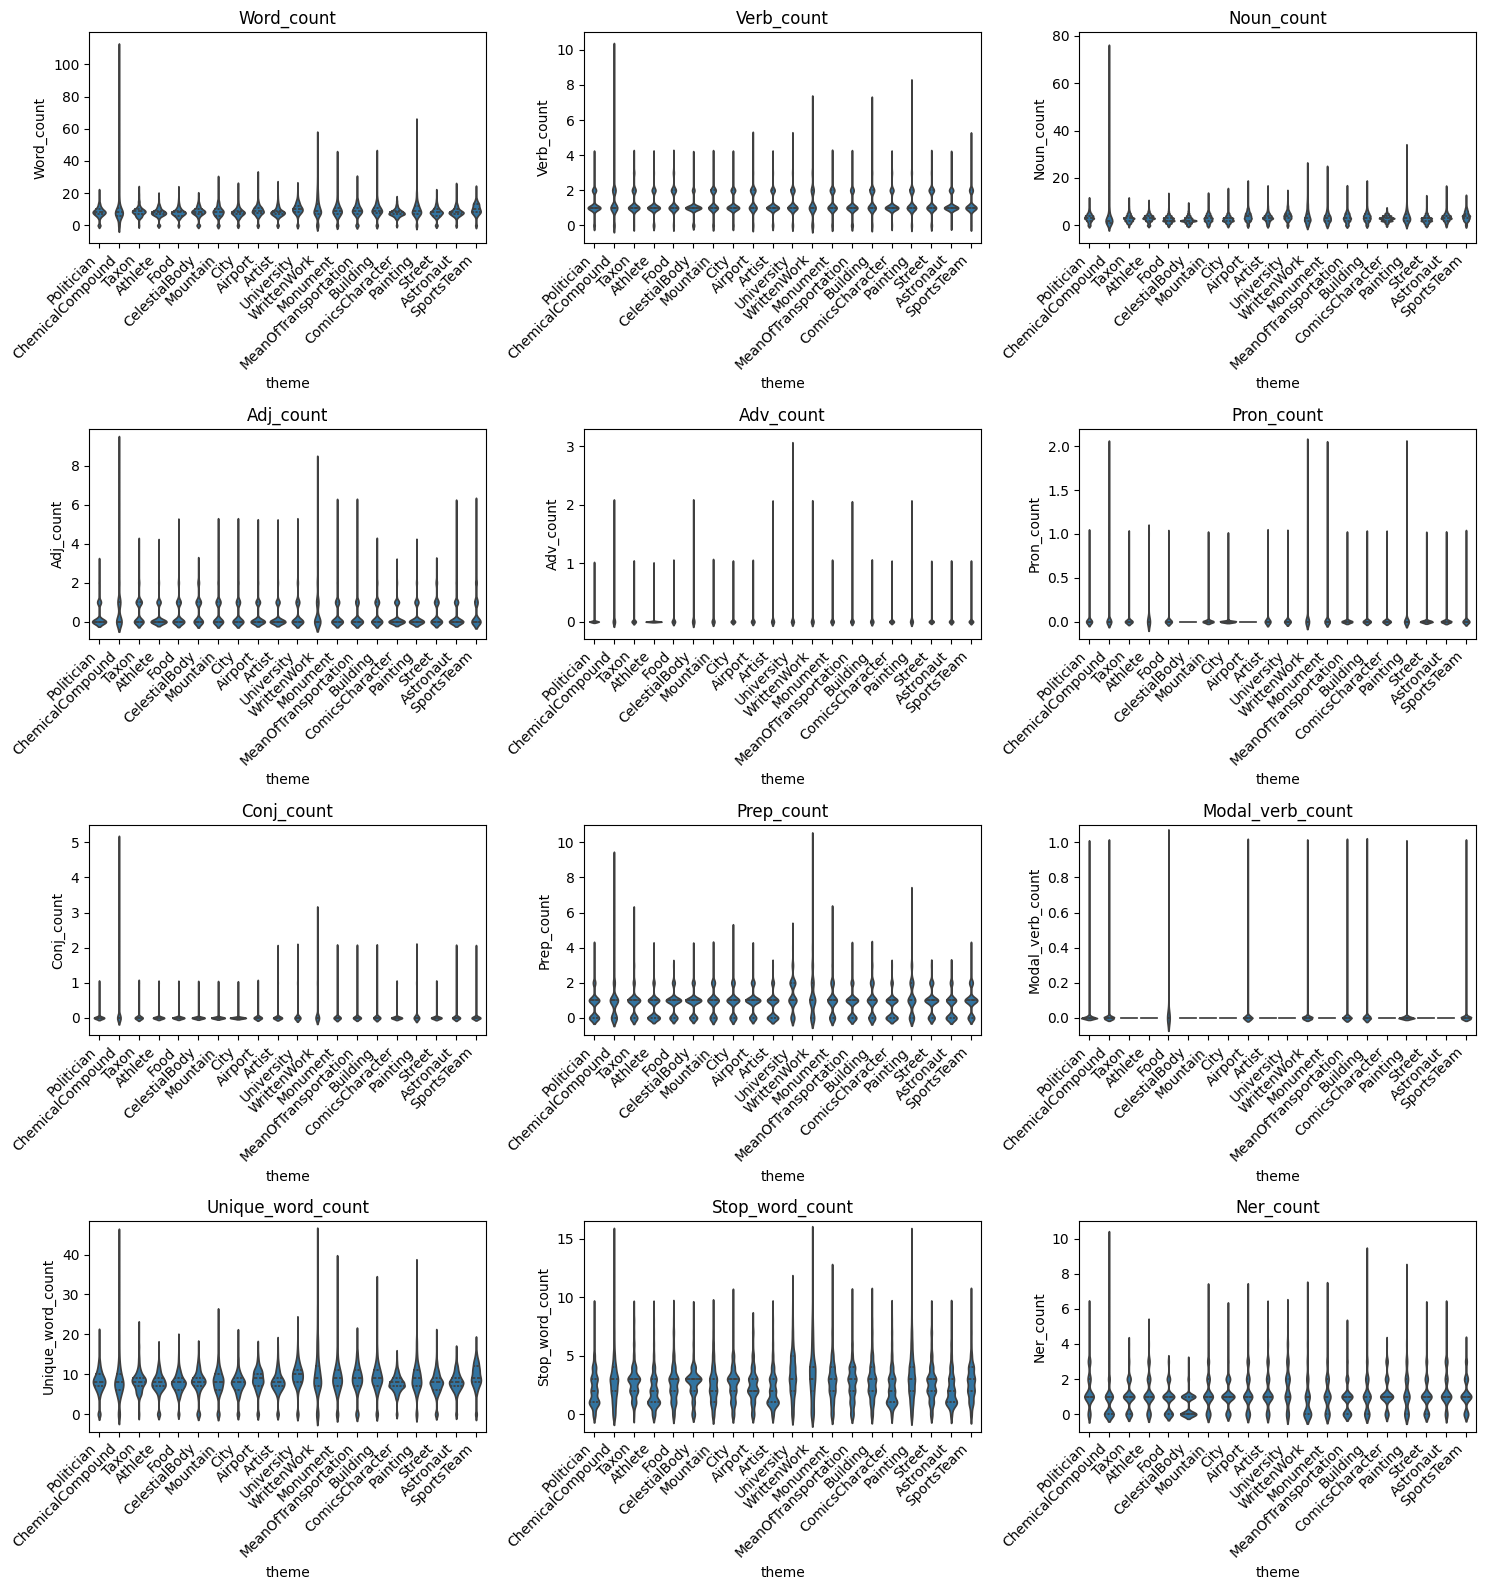

In [3]:
# Columns to plot
columns_to_plot = ['Word_count', 'Verb_count', 'Noun_count', 'Adj_count', 
                   'Adv_count', 'Pron_count', 'Conj_count', 'Prep_count', 
                   'Modal_verb_count', 'Unique_word_count', 'Stop_word_count', 'Ner_count']

# Define the number of rows and columns for subplots
n_cols = 3  # Adjust the number of columns per row as needed
n_rows = int(len(columns_to_plot) / n_cols) + (len(columns_to_plot) % n_cols > 0)

# Set up the matplotlib figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4)) # removed sharey=True

# Flatten the axes array if necessary
if n_rows * n_cols > 1:
    axes = axes.flatten()

# Iterate over each subplot
for ax, metric in zip(axes, columns_to_plot):
    sns.violinplot(x='theme', y=metric, data=dfs, ax=ax, inner='quartile')
    ax.set_title(metric)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    # Set the y-axis limits dynamically
    min_val = dfs[metric].min()
    max_val = dfs[metric].max()
    ax.set_ylim(min_val - (max_val - min_val) * 0.1, max_val + (max_val - min_val) * 0.1)

# Hide any excess subplots
for i in range(len(columns_to_plot), n_rows * n_cols):
    fig.delaxes(axes[i])

# Adjust the layout
plt.tight_layout()

# Show plot
plt.show()

In [4]:
entries = os.listdir('../Data/User-Based_Evaluation')
human = {}
for e in entries:
    human[str(e.split(' ')[0])] =  pd.read_csv(f'../Data/User-Based_Evaluation/{e}').iloc[1:3]

In [5]:
df_human = pd.DataFrame()
for h in human.keys():
    df = human[f'{h}']
    new_columns = ['task1', 'task2.1', 'task2.2', 'task2.3']

    # Select the relevant columns for each task
    # Assuming that the columns are ordered as they appear in your provided data structure
    task1_columns = [col for col in df.columns if 'Task 1' in col]
    task2_1_columns = [col for col in df.columns if 'Task 2.1' in col]
    task2_2_columns = [col for col in df.columns if 'Task 2.2' in col]
    task2_3_columns = [col for col in df.columns if 'Task 2.3' in col]

    # Concatenate the data from the respective columns
    # We will iterate over the rows and for each "set" of tasks (1, 2.1, 2.2, 2.3) we will create a new row in the reformatted DataFrame
    reformatted_data = []
    for index, row in df.iterrows():
        for i in range(len(task1_columns)):
            reformatted_data.append([
                row[task1_columns[i]],
                row[task2_1_columns[i]],
                row[task2_2_columns[i]],
                row[task2_3_columns[i]]
            ])

    # Create a new DataFrame with the reformatted data
    reformatted_df = pd.DataFrame(reformatted_data, columns=new_columns)
    reformatted_df['theme']  = f'{h}'
    df_human = pd.concat([df_human,reformatted_df])
new_column_names = {
    'task1': 'verbalization',
    'task2.1': 'subjectCQ',
    'task2.2': 'propertyCQ',
    'task2.3': 'objectCQ',
    'theme': 'theme'
}
df_human.rename(columns=new_column_names, inplace=True)
df_human.dropna(inplace=True, axis=0)


In [6]:
def count_tokens(sentence):
    words = word_tokenize(sentence)
    return len(words)

def count_pos_tags(sentence, tag_prefix):
    words = word_tokenize(sentence)
    pos_tags = pos_tag(words)
    return sum(1 for word, tag in pos_tags if tag.startswith(tag_prefix))

def count_unique_words(sentence):
    words = word_tokenize(sentence)
    return len(set(words))

def count_stop_words(sentence):
    words = word_tokenize(sentence)
    return sum(1 for word in words if word in stopwords.words('english'))

def count_sentence_length(sentence):
    if isinstance(sentence, float):  # Check if the input is a float
        return 0  # Or handle the float in a way that makes sense for your context
    return len(sentence)


def count_named_entities(text):
    sentences = sent_tokenize(text)
    named_entities = []

    for sentence in sentences:
        words = word_tokenize(sentence)
        tagged_words = pos_tag(words)
        ne_tree = ne_chunk(tagged_words)

        for subtree in ne_tree:
            if hasattr(subtree, 'label'):  # Check if it's a NE subtree
                named_entities.append(subtree)

    return len(named_entities)

verbalization_df = pd.DataFrame()
verbalization_df['length'] = df_human['verbalization'].apply(count_sentence_length)
verbalization_df['Word_count'] = df_human['verbalization'].apply(count_tokens)
verbalization_df['Verb_count'] = df_human['verbalization'].apply(lambda x: count_pos_tags(x, 'VB'))
verbalization_df['Noun_count'] = df_human['verbalization'].apply(lambda x: count_pos_tags(x, 'NN'))
verbalization_df['Adj_count'] = df_human['verbalization'].apply(lambda x: count_pos_tags(x, 'JJ'))
verbalization_df['Adv_count'] = df_human['verbalization'].apply(lambda x: count_pos_tags(x, 'RB'))
verbalization_df['Pron_count'] = df_human['verbalization'].apply(lambda x: count_pos_tags(x, 'PRP'))
verbalization_df['Conj_count'] = df_human['verbalization'].apply(lambda x: count_pos_tags(x, 'CC'))
verbalization_df['Prep_count'] = df_human['verbalization'].apply(lambda x: count_pos_tags(x, 'IN'))
verbalization_df['Modal_verb_count'] = df_human['verbalization'].apply(lambda x: count_pos_tags(x, 'MD'))
verbalization_df['Unique_word_count'] = df_human['verbalization'].apply(count_unique_words)
verbalization_df['Stop_word_count'] = df_human['verbalization'].apply(count_stop_words)
verbalization_df['Ner_count'] = df_human['verbalization'].apply(count_named_entities)

subject_df = pd.DataFrame()
subject_df['length'] = df_human['subjectCQ'].apply(count_sentence_length)
subject_df['Word_count'] = df_human['subjectCQ'].apply(count_tokens)
subject_df['Verb_count'] = df_human['subjectCQ'].apply(lambda x: count_pos_tags(x, 'VB'))
subject_df['Noun_count'] = df_human['subjectCQ'].apply(lambda x: count_pos_tags(x, 'NN'))
subject_df['Adj_count'] = df_human['subjectCQ'].apply(lambda x: count_pos_tags(x, 'JJ'))
subject_df['Adv_count'] = df_human['subjectCQ'].apply(lambda x: count_pos_tags(x, 'RB'))
subject_df['Pron_count'] = df_human['subjectCQ'].apply(lambda x: count_pos_tags(x, 'PRP'))
subject_df['Conj_count'] = df_human['subjectCQ'].apply(lambda x: count_pos_tags(x, 'CC'))
subject_df['Prep_count'] = df_human['subjectCQ'].apply(lambda x: count_pos_tags(x, 'IN'))
subject_df['Modal_verb_count'] = df_human['subjectCQ'].apply(lambda x: count_pos_tags(x, 'MD'))
subject_df['Unique_word_count'] = df_human['subjectCQ'].apply(count_unique_words)
subject_df['Stop_word_count'] = df_human['subjectCQ'].apply(count_stop_words)
subject_df['Ner_count'] = df_human['subjectCQ'].apply(count_named_entities)

property_df = pd.DataFrame()
property_df['length'] = df_human['propertyCQ'].apply(count_sentence_length)
property_df['Word_count'] = df_human['propertyCQ'].apply(count_tokens)
property_df['Verb_count'] = df_human['propertyCQ'].apply(lambda x: count_pos_tags(x, 'VB'))
property_df['Noun_count'] = df_human['propertyCQ'].apply(lambda x: count_pos_tags(x, 'NN'))
property_df['Adj_count'] = df_human['propertyCQ'].apply(lambda x: count_pos_tags(x, 'JJ'))
property_df['Adv_count'] = df_human['propertyCQ'].apply(lambda x: count_pos_tags(x, 'RB'))
property_df['Pron_count'] = df_human['propertyCQ'].apply(lambda x: count_pos_tags(x, 'PRP'))
property_df['Conj_count'] = df_human['propertyCQ'].apply(lambda x: count_pos_tags(x, 'CC'))
property_df['Prep_count'] = df_human['propertyCQ'].apply(lambda x: count_pos_tags(x, 'IN'))
property_df['Modal_verb_count'] = df_human['propertyCQ'].apply(lambda x: count_pos_tags(x, 'MD'))
property_df['Unique_word_count'] = df_human['propertyCQ'].apply(count_unique_words)
property_df['Stop_word_count'] = df_human['propertyCQ'].apply(count_stop_words)
property_df['Ner_count'] = df_human['propertyCQ'].apply(count_named_entities)

object_df = pd.DataFrame()
object_df['length'] = df_human['objectCQ'].apply(count_sentence_length)
object_df['Word_count'] = df_human['objectCQ'].apply(count_tokens)
object_df['Verb_count'] = df_human['objectCQ'].apply(lambda x: count_pos_tags(x, 'VB'))
object_df['Noun_count'] = df_human['objectCQ'].apply(lambda x: count_pos_tags(x, 'NN'))
object_df['Adj_count'] = df_human['objectCQ'].apply(lambda x: count_pos_tags(x, 'JJ'))
object_df['Adv_count'] = df_human['objectCQ'].apply(lambda x: count_pos_tags(x, 'RB'))
object_df['Pron_count'] = df_human['objectCQ'].apply(lambda x: count_pos_tags(x, 'PRP'))
object_df['Conj_count'] = df_human['objectCQ'].apply(lambda x: count_pos_tags(x, 'CC'))
object_df['Prep_count'] = df_human['objectCQ'].apply(lambda x: count_pos_tags(x, 'IN'))
object_df['Modal_verb_count'] = df_human['objectCQ'].apply(lambda x: count_pos_tags(x, 'MD'))
object_df['Unique_word_count'] = df_human['objectCQ'].apply(count_unique_words)
object_df['Stop_word_count'] = df_human['objectCQ'].apply(count_stop_words)
object_df['Ner_count'] = df_human['objectCQ'].apply(count_named_entities)

verbalization_df1 = dfs[dfs['key']=='context'].drop(['key','item', 'theme'], axis=1)
subject_df1 = dfs[dfs['key']=='subjectCQ'].drop(['key','item', 'theme'], axis=1)
property_df1 = dfs[dfs['key']=='propertyCQ'].drop(['key','item', 'theme'], axis=1)
object_df1 = dfs[dfs['key']=='objectCQ'].drop(['key','item', 'theme'], axis=1)


/tmp/ipykernel_48182/2282508304.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=ticks_fontsize)
/tmp/ipykernel_48182/2282508304.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=ticks_fontsize)
/tmp/ipykernel_48182/2282508304.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=ticks_fontsize)
/tmp/ipykernel_48182/2282508304.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=4

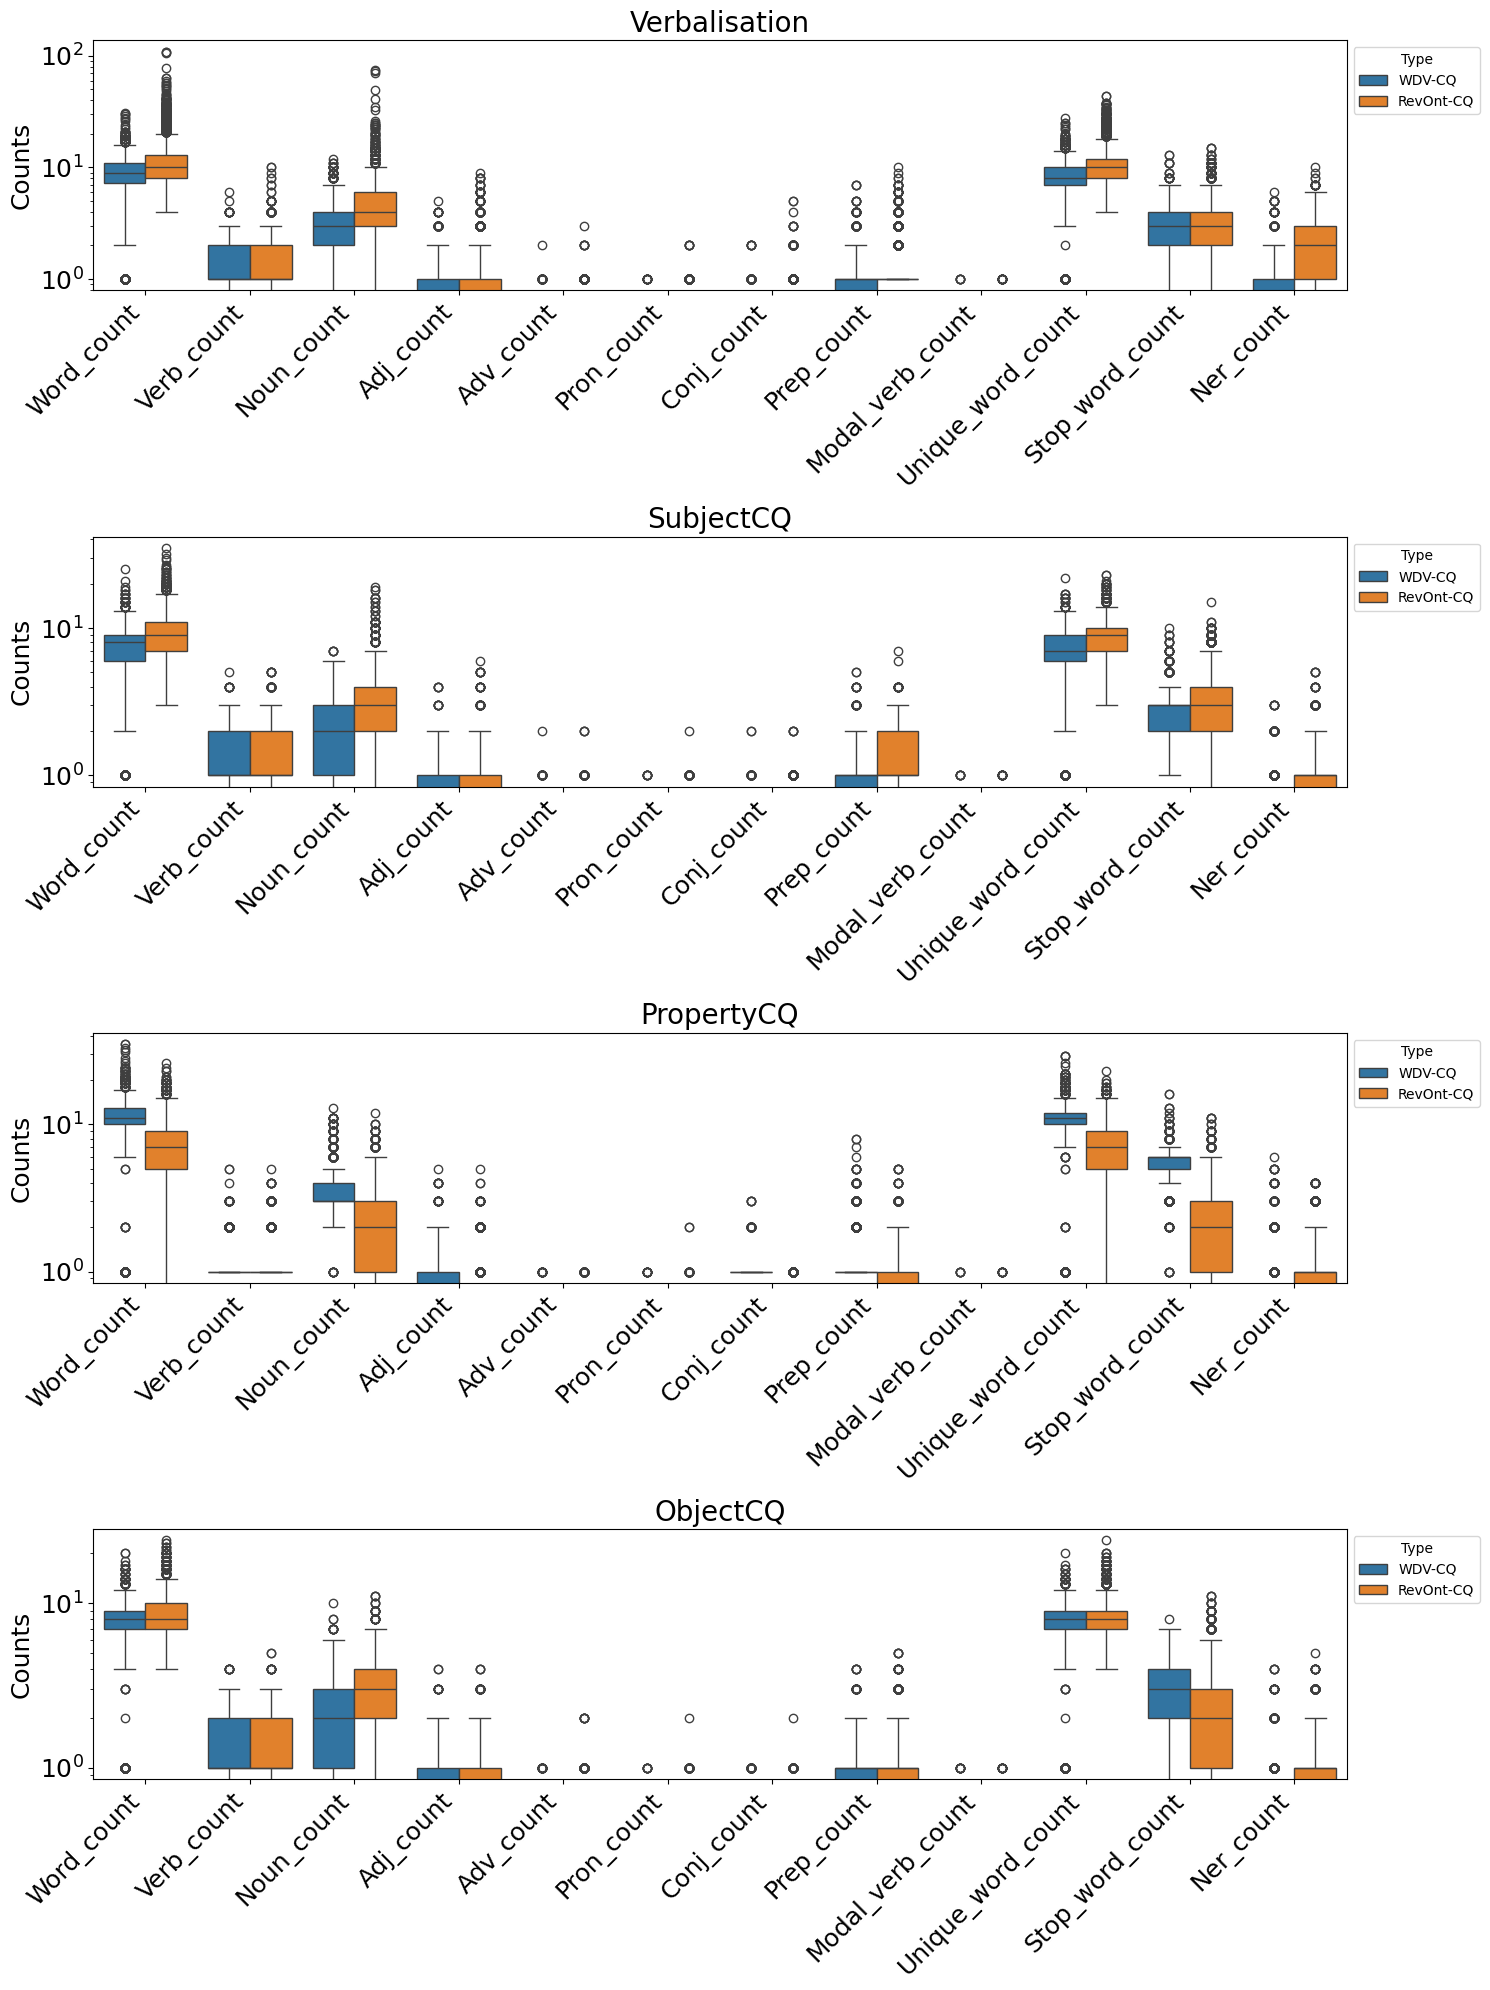

In [7]:
# Define your original and new sets of dataframes
original_dataframes = [verbalization_df, subject_df, property_df, object_df]
new_dataframes = [verbalization_df1, subject_df1, property_df1, object_df1]

# Titles for each subplot
titles = ['Verbalisation', 'SubjectCQ', 'PropertyCQ', 'ObjectCQ']

# Set up the matplotlib figure (adjust figsize as needed)
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 20))  # Adjust for a larger overall figure size

# Font size configuration
title_fontsize = 20  # Adjust title font size as needed
label_fontsize = 18  # Adjust label font size as needed
ticks_fontsize = 18  # Adjust ticks font size as needed

# Iterate over each subplot, original dataframe, new dataframe, and title
for ax, original_df, new_df, title in zip(axes.flatten(), original_dataframes, new_dataframes, titles):
    # Selecting relevant columns for x-axis: verb_count, noun_count, etc.
    # Assuming these columns are common in structure for all dataframes
    feature_cols = [col for col in original_df.columns if 'count' in col]
    
    # Prepare the data by melting the original and new dataframes
    melted_original_df = original_df.melt(value_vars=feature_cols)
    melted_new_df = new_df.melt(value_vars=feature_cols)
    
    # Combine the melted dataframes, add a new 'Type' column to distinguish between them
    melted_original_df['Type'] = 'WDV-CQ'
    melted_new_df['Type'] = 'RevOnt-CQ'
    combined_melted_df = pd.concat([melted_original_df, melted_new_df])

    # Using boxplot to represent both original and new data side by side
    sns.boxplot(x='variable', y='value', hue='Type', data=combined_melted_df, ax=ax)
    ax.set_yscale('log')

    # Set titles and labels with increased font size
    ax.set_title(title, fontsize=title_fontsize)
    #ax.set_xlabel('Features', fontsize=label_fontsize)
    ax.xaxis.label.set_visible(False)
    ax.set_ylabel('Counts', fontsize=label_fontsize)
    
    # Set tick parameters with increased font size
    ax.tick_params(axis='x', labelsize=ticks_fontsize)
    ax.tick_params(axis='y', labelsize=ticks_fontsize)
    
    # Rotate the x-axis labels to prevent overlap
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=ticks_fontsize)

    # Move the legend to a better position
    ax.legend(title='Type', bbox_to_anchor=(1, 1), loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [8]:
from scipy import stats

types = ['Verbailization', 'SubjectCQ','PropertyCQ','ObjectCQ']
features = ['Word_count', 'Verb_count', 'Noun_count', 'Adj_count', 'Prep_count', 'Unique_word_count', 'Stop_word_count', 'Ner_count']

test_results = []
for original_df, new_df, t in zip(original_dataframes, new_dataframes, types):
    for feature in features:
        original_values = original_df[feature].values
        new_values = new_df[feature].values

        # Perform the Kruskal-Wallis H-test
        kw_stat, kw_p = stats.kruskal(original_values, new_values)
        
        # Perform the Kolmogorov-Smirnov test
        ks_stat, ks_p = stats.ks_2samp(original_values, new_values)

        test_results.append({
            'Type': t,
            'Feature': feature,
            'KW_Statistic': kw_stat,
            'KW_P-value': kw_p.round(4),
            'KS_Statistic': ks_stat,
            'KS_P-value': ks_p.round(4)
        })

results_df = pd.DataFrame(test_results)
results_df

results_df = pd.DataFrame(test_results)

results_df

,Type,Feature,KW_Statistic,KW_P-value,KS_Statistic,KS_P-value
0,Verbailization,Word_count,250.782376,0.0000,0.156372,0.0000
1,Verbailization,Verb_count,46.072002,0.0000,0.070946,0.0000
2,Verbailization,Noun_count,921.651230,0.0000,0.359505,0.0000
3,Verbailization,Adj_count,10.788354,0.0010,0.038982,0.0193
4,Verbailization,Prep_count,64.238313,0.0000,0.110571,0.0000
5,Verbailization,Unique_word_count,384.134721,0.0000,0.215905,0.0000
6,Verbailization,Stop_word_count,12.902460,0.0003,0.068503,0.0000
7,Verbailization,Ner_count,2555.046454,0.0000,0.648807,0.0000
8,SubjectCQ,Word_count,529.445665,0.0000,0.221271,0.0000
9,SubjectCQ,Verb_count,42.704967,0.0000,0.071282,0.0000


In [9]:
import pandas as pd
import nltk
import textstat
from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

dfs = dfs.iloc[:,:3]
def calculateStatistics(df):
    dfs = df
    def count_clauses(sentence):
        words = word_tokenize(sentence)
        tagged = pos_tag(words)
        # Simple heuristic: count the number of conjunctions as an approximation for clauses
        clause_markers = {'CC', 'IN'}
        return sum(1 for word, tag in tagged if tag in clause_markers)

    def analyze_sentence(sentence):
        return count_clauses(sentence)
          
    def analyze_readability(sentence):
        fk_grade = textstat.flesch_kincaid_grade(sentence)
        gunning_fog = textstat.gunning_fog(sentence)
        coleman_liau_index = textstat.coleman_liau_index(sentence)
        automated_readability_index = textstat.automated_readability_index(sentence)
        dale_chall_readability_score = textstat.dale_chall_readability_score(sentence)
        Linsear = textstat.linsear_write_formula(sentence)
        Gunning = textstat.gunning_fog(sentence)

        return fk_grade, gunning_fog, coleman_liau_index, automated_readability_index, dale_chall_readability_score, Linsear, Gunning

    # Applying the function to the DataFrame
    for index, row in dfs.iterrows():
        fk_grade, gunning_fog, coleman_liau_index, automated_readability_index, dale_chall_readability_score, Linsear, Gunning = analyze_readability(row['item'])
        dfs.at[index, 'Flesch_kincaid_grade'] = fk_grade
        dfs.at[index, 'Coleman_liau'] = coleman_liau_index
        dfs.at[index, 'Automated_readability'] = automated_readability_index
        dfs.at[index, 'Gunning_fog'] = gunning_fog
        dfs.at[index, 'Dale_chall_readability'] = dale_chall_readability_score
        dfs.at[index, 'Linsear_write'] = Linsear
        dfs.at[index, 'Gunning_fog'] = Gunning



    return dfs

[nltk_data] Downloading package punkt to /users/k2369089/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /users/k2369089/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [10]:
verbalization_df = calculateStatistics(df_human.rename(columns={'verbalization':'item'}))
subject_df = calculateStatistics(df_human.rename(columns={'subjectCQ':'item'}))
property_df = calculateStatistics(df_human.rename(columns={'propertyCQ':'item'}))
object_df = calculateStatistics(df_human.rename(columns={'objectCQ':'item'}))
verbalization_df1 = calculateStatistics(dfs[dfs['key']=='context'])
subject_df1 = calculateStatistics(dfs[dfs['key']=='subjectCQ'])
property_df1 = calculateStatistics(dfs[dfs['key']=='propertyCQ'])
object_df1 = calculateStatistics(dfs[dfs['key']=='objectCQ'])

/tmp/ipykernel_48182/2657120075.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs.at[index, 'Flesch_kincaid_grade'] = fk_grade
/tmp/ipykernel_48182/2657120075.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs.at[index, 'Coleman_liau'] = coleman_liau_index
/tmp/ipykernel_48182/2657120075.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

/tmp/ipykernel_48182/135292394.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=ticks_fontsize)
/tmp/ipykernel_48182/135292394.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=ticks_fontsize)
/tmp/ipykernel_48182/135292394.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=ticks_fontsize)
/tmp/ipykernel_48182/135292394.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, h

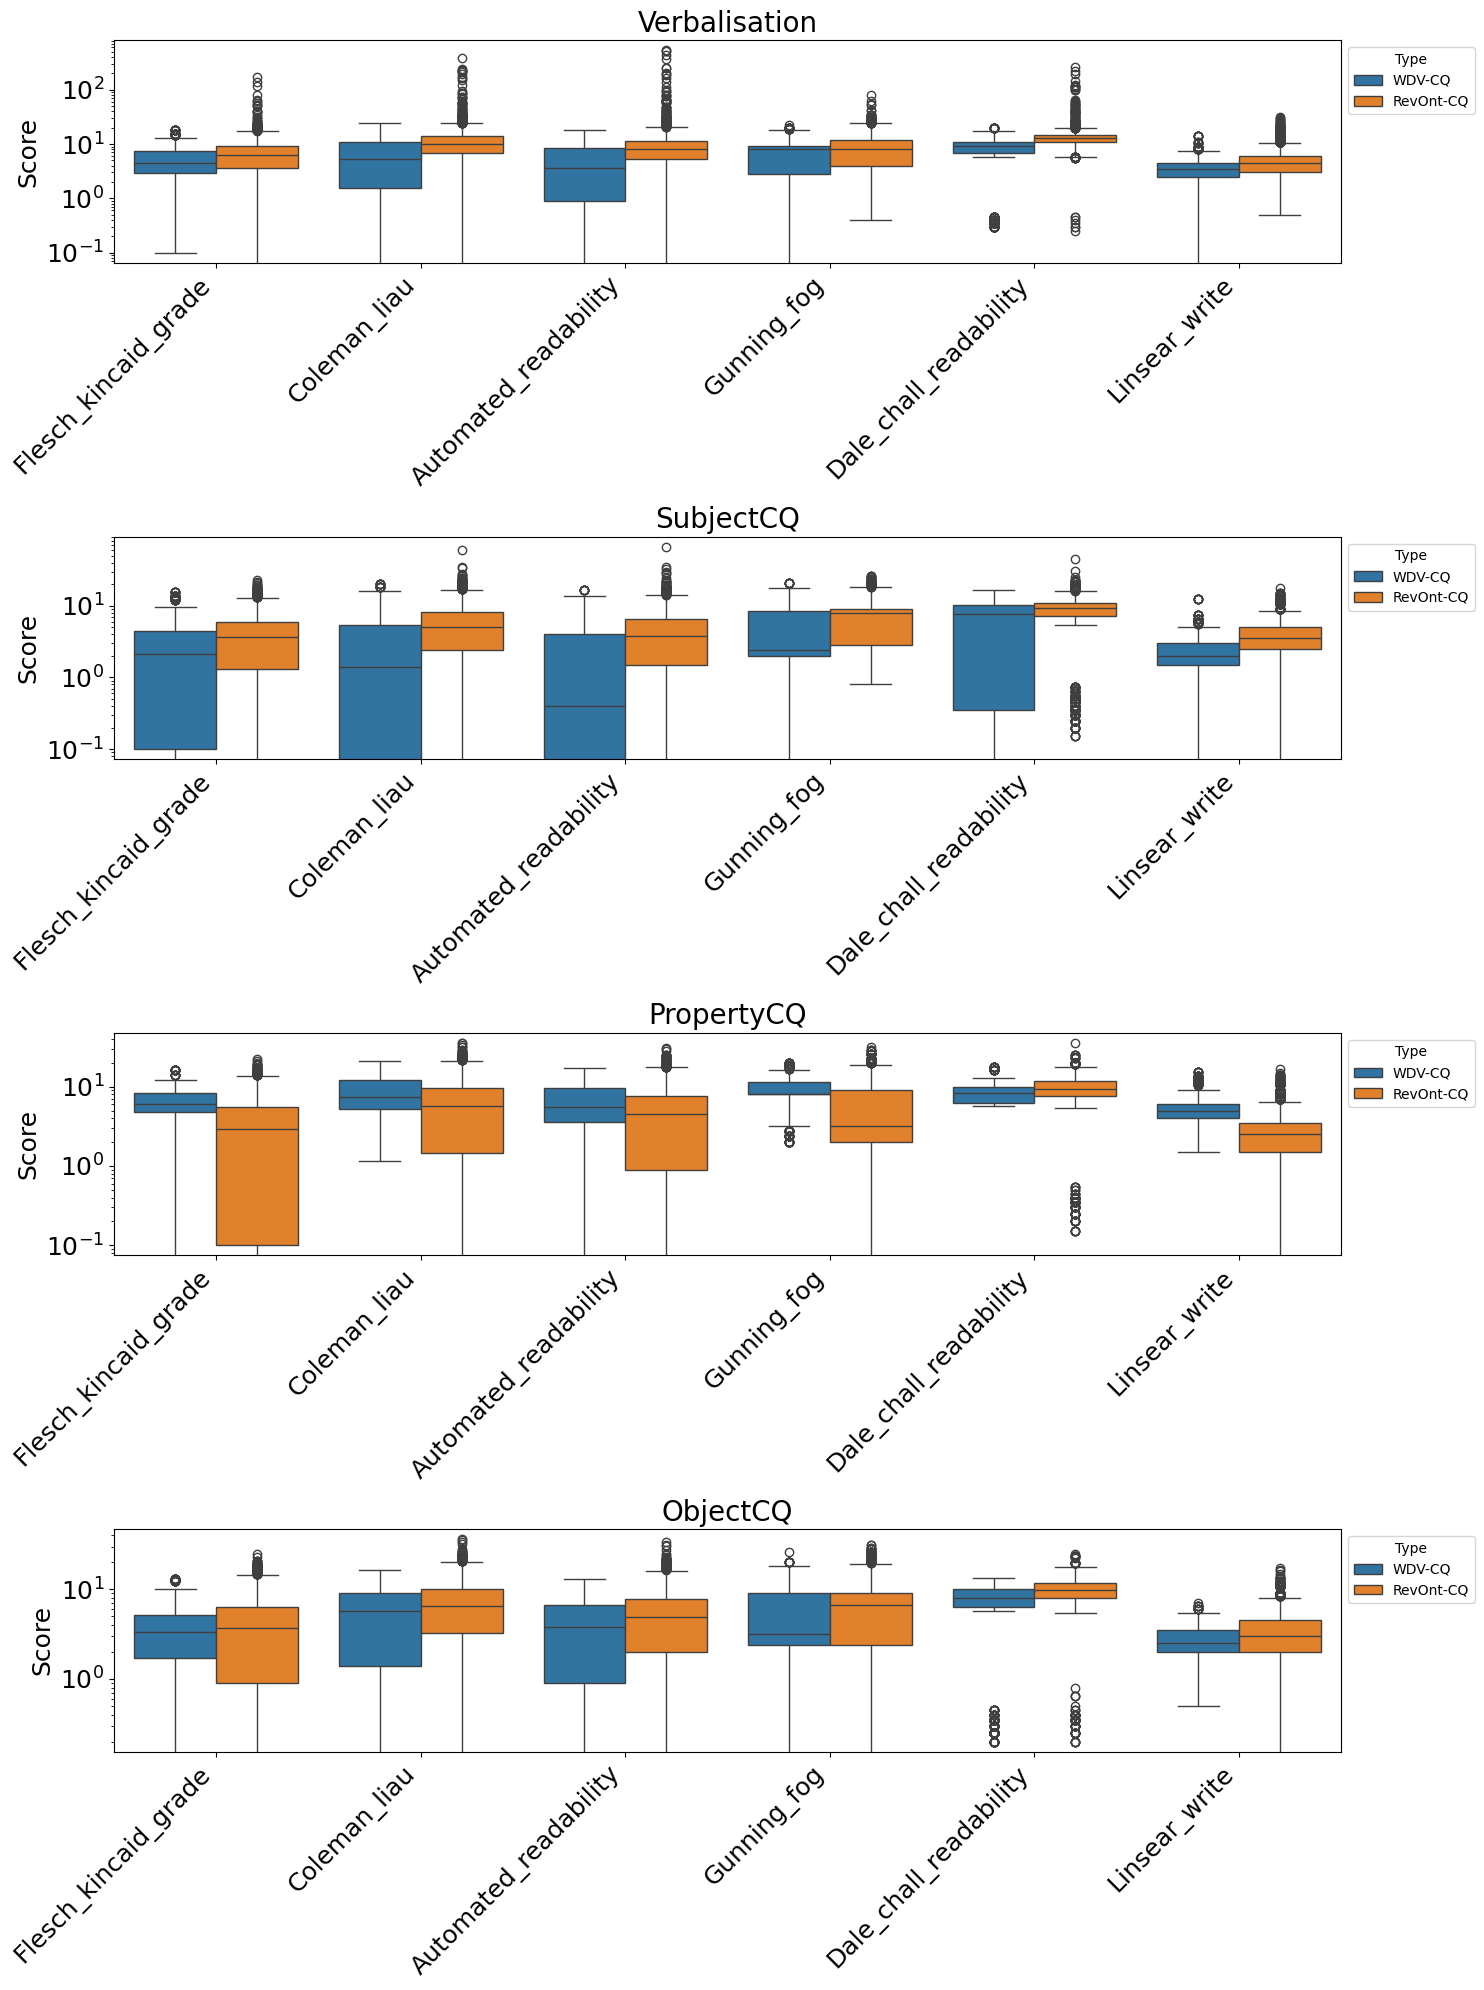

In [11]:
# Define your original and new sets of dataframes
original_dataframes = [verbalization_df, subject_df, property_df, object_df]
new_dataframes = [verbalization_df1, subject_df1, property_df1, object_df1]

# Titles for each subplot
titles = ['Verbalisation', 'SubjectCQ', 'PropertyCQ', 'ObjectCQ']

# Set up the matplotlib figure (adjust figsize as needed)
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 20))  # Adjust for a larger overall figure size

# Font size configuration
title_fontsize = 20  # Adjust title font size as needed
label_fontsize = 18  # Adjust label font size as needed
ticks_fontsize = 18  # Adjust ticks font size as needed

# Iterate over each subplot, original dataframe, new dataframe, and title
for ax, original_df, new_df, title in zip(axes.flatten(), original_dataframes, new_dataframes, titles):
    # Selecting relevant columns for x-axis: verb_count, noun_count, etc.
    # Assuming these columns are common in structure for all dataframes
    feature_cols = original_df.columns[5:]
    
    # Prepare the data by melting the original and new dataframes
    melted_original_df = original_df.melt(value_vars=feature_cols)
    melted_new_df = new_df.melt(value_vars=feature_cols)
    
    # Combine the melted dataframes, add a new 'Type' column to distinguish between them
    melted_original_df['Type'] = 'WDV-CQ'
    melted_new_df['Type'] = 'RevOnt-CQ'
    combined_melted_df = pd.concat([melted_original_df, melted_new_df])

    # Using boxplot to represent both original and new data side by side
    sns.boxplot(x='variable', y='value', hue='Type', data=combined_melted_df, ax=ax)
    ax.set_yscale('log')

    # Set titles and labels with increased font size
    ax.set_title(title, fontsize=title_fontsize)
    #ax.set_xlabel('Features', fontsize=label_fontsize)
    ax.xaxis.label.set_visible(False)
    ax.set_ylabel('Score', fontsize=label_fontsize)
    
    # Set tick parameters with increased font size
    ax.tick_params(axis='x', labelsize=ticks_fontsize)
    ax.tick_params(axis='y', labelsize=ticks_fontsize)
    
    # Rotate the x-axis labels to prevent overlap
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=ticks_fontsize)

    # Move the legend to a better position
    ax.legend(title='Type', bbox_to_anchor=(1, 1), loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [12]:
from scipy import stats
import pandas as pd

# Assuming original_dataframes and new_dataframes are predefined lists of dataframes.

types = ['Verbalization', 'SubjectCQ', 'PropertyCQ', 'ObjectCQ']
features = ['Flesch_kincaid_grade', 'Coleman_liau', 'Automated_readability', 'Gunning_fog', 
            'Dale_chall_readability', 'Linsear_write', 'Gunning_fog']

test_results = []
for original_df, new_df, t in zip(original_dataframes, new_dataframes, types):
    for feature in features:
        original_values = original_df[feature].values
        new_values = new_df[feature].values

        # Perform the Kruskal-Wallis H-test
        kw_stat, kw_p = stats.kruskal(original_values, new_values)
        
        # Perform the Kolmogorov-Smirnov test
        ks_stat, ks_p = stats.ks_2samp(original_values, new_values)

        test_results.append({
            'Type': t,
            'Feature': feature,
            'KW_Statistic': kw_stat,
            'KW_P-value': kw_p.round(4),
            'KS_Statistic': ks_stat,
            'KS_P-value': ks_p.round(4)
        })

results_df = pd.DataFrame(test_results)
results_df


,Type,Feature,KW_Statistic,KW_P-value,KS_Statistic,KS_P-value
0,Verbalization,Flesch_kincaid_grade,158.784591,0.0000,0.169646,0.0
1,Verbalization,Coleman_liau,592.650741,0.0000,0.354422,0.0
2,Verbalization,Automated_readability,740.677974,0.0000,0.363827,0.0
3,Verbalization,Gunning_fog,288.482962,0.0000,0.210498,0.0
4,Verbalization,Dale_chall_readability,1462.588776,0.0000,0.476045,0.0
5,Verbalization,Linsear_write,492.738152,0.0000,0.237106,0.0
6,Verbalization,Gunning_fog,288.482962,0.0000,0.210498,0.0
7,SubjectCQ,Flesch_kincaid_grade,313.991236,0.0000,0.239295,0.0
8,SubjectCQ,Coleman_liau,845.836495,0.0000,0.377074,0.0
9,SubjectCQ,Automated_readability,787.841328,0.0000,0.362591,0.0


In [13]:
df_human

,verbalization,subjectCQ,propertyCQ,objectCQ,theme
0,A fictional character plays a role.,What fictional character plays a role?,What is the relation between a fictional chara...,What role does a fictional character play?,Astronaut
1,A person is nicknamed a name.,What person is nicknamed a name?,What is the relation between a person and a name?,What nickname does a person have?,Astronaut
2,A person was involved in a war.,What person was involved in a war?,What is the relation between a person and a war?,What is a person involved in?,Astronaut
3,A fictional character's catchphrase is a phrase.,What fictional character's catchphrase is a ph...,What is the relation between a fictional chara...,What phrase is the catchphrase of a fictional ...,Astronaut
4,A person is a candidate in an election.,What person is a candidate in an election?,What is the relation between a person and an e...,What election is a person a candidate in?,Astronaut
...,...,...,...,...,...
107,A person is born on a time.,Who is born in a time?,What is the relation between a person and a time?,When is a person born?,Politician
108,A person is a citizen of a state.,Who is a citizen of a state?,What is the relation between a citizen and a s...,What state is a person a citizen of?,Politician
109,A person's sex or gender is a gender.,What is a gender?,What is the relation between a person and a ge...,What is a person's sex or gender?,Politician
110,A person is a member of a parliament.,Who is a member of a parliament?,What is the relation between a person and a pa...,What is a person a member of?,Politician


In [14]:
pvioted_dfs = dfs.pivot(columns='key', values='item')
pvioted_dfs

key,context,objectCQ,propertyCQ,subjectCQ
0,The catalog code for Manfred Nink is 11004121.,NaN,NaN,NaN
1,The catalog code for Wilfried Bohlsen is 11000...,NaN,NaN,NaN
2,The catalog code for Martin Pätzold is 11004373.,NaN,NaN,NaN
3,Klaus Francke's catalog code is 11000569.,NaN,NaN,NaN
4,The catalog code for Ilse Schumann is 11002794.,NaN,NaN,NaN
...,...,...,...,...
30423,NaN,What did the Chinese women's national road cyc...,NaN,NaN
30424,NaN,What does the Kazakhstani women's national roa...,NaN,NaN
30425,NaN,What sport do the Campbellton Tigers play?,NaN,NaN
30426,NaN,What sport does Niort Rugby Club play?,NaN,NaN
